<a href="https://colab.research.google.com/github/d0k7/Pattern-Recognition-Machine-Learning-Lab-Code/blob/main/PR_%26_ML_LAB_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1) Data pre-processing using Python Machine Learning libraries/ MATLAB.**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd

# Importing dataset
dataset = pd.read_csv('/content/Data.csv')
x = dataset.iloc[:, :-1].values  # Independent variable matrix
y = dataset.iloc[:, 3].values     # Dependent vector variable

print(x)
print(y)



#Handling missing data
# Using SimpleImputer to handle missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Automatically handles NaN values

# Fit the imputer to the columns with missing values (columns 1 and 2)
imputer = imputer.fit(x[:, 1:3])

# Transform the dataset by replacing missing values with the mean of respective columns
x[:, 1:3] = imputer.transform(x[:, 1:3])

print(x)



#Encoding categoricaal data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x=LabelEncoder()
x[:,0]=labelencoder_x.fit_transform(x[:,0])
print(x[:,0])

# Define the ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])],  # Apply OneHotEncoder to the first column
    remainder='passthrough'  # Keep the remaining columns unchanged
)

x = column_transformer.fit_transform(x)

print(x)




# Label encoding the dependent variable y (if it's categorical)
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

print(y)






#splitting dataset into traning set and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)
print(x_train, x_test, y_train, y_test)



#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
print(x_train)
print(x_test)



[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
[0 2 1 2 1 0 2 0 1 0]
[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
[0 1 0 0 1 1 0 1 0 1]
[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0

**Q2) Design a model to predict the housing price from California Dataset using Multivariate Linear Regression.**



In [5]:
import numpy as np

# Load the California housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Combine every two rows of raw data to form the feature matrix and target variable
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Access features and target variable
X_ca, y_ca = data[:, :-1], target

# Add a bias term to the features
X_ca = np.c_[np.ones(X_ca.shape[0]), X_ca]

# Calculate the split index based on the specified split ratio
split_ratio = 0.8
split_index = int(split_ratio * len(data))

# Split the data into training and testing sets
X_train_ca, X_test_ca = X_ca[:split_index], X_ca[split_index:]
y_train_ca, y_test_ca = y_ca[:split_index], y_ca[split_index:]

# Function to train the Multivariate Linear Regression model
def train_linear_regression(X, y):
    # Normal equation to find the optimal parameters (theta)
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Train the model
theta_ca = train_linear_regression(X_train_ca, y_train_ca)

# Function to make predictions
def predict(X, theta):
    # Prediction using the learned parameters
    return X @ theta

# Make predictions on the test set
y_pred_ca = predict(X_test_ca, theta_ca)

# Evaluate the model
mse_ca = np.mean((y_test_ca - y_pred_ca) ** 2)
print(f'Mean Squared Error on California Housing Dataset: {mse_ca}')

# Inspect coefficients and intercept
coefficients_ca = {feature: coef for feature, coef in zip(housing.feature_names, theta_ca[1:])}
intercept_ca = theta_ca[0]

print('Intercept:', intercept_ca)
print('Coefficients:', coefficients_ca)


Mean Squared Error on California Housing Dataset: 57.82528448748533
Intercept: 16.397990355305797
Coefficients: {'MedInc': -0.3194172807494916, 'HouseAge': 0.0370060061801942, 'AveRooms': -0.002527068747934, 'AveBedrms': 2.1995723680685484, 'Population': -18.147430171828365, 'AveOccup': 7.21349695937051, 'Latitude': -0.04437814584834038, 'Longitude': -1.3933480792190571}


**Q3) Build a classifier using Logistic Regression without using SK-Learn create a dummy dataset use  it.**

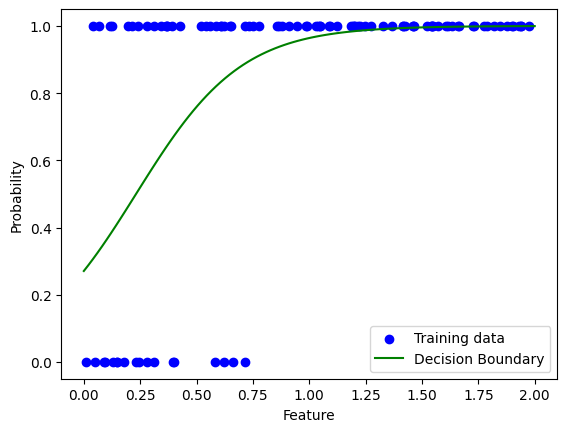

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dummy dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1)) > 5  # Binary classification

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.zeros((2, 1))
m = len(y)
n_iterations = 1000

# Logistic function (sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression training loop
for iteration in range(n_iterations):
    logits = np.dot(X_b, theta)
    y_proba = sigmoid(logits)

    # Compute gradient
    gradient = 1/m * np.dot(X_b.T, (y_proba - y))

    # Update parameters using fixed learning rate (you can modify this if needed)
    theta -= gradient

# Function to make predictions
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    logits = np.dot(X_b, theta)
    return (sigmoid(logits) >= 0.5).astype(int)

# Make predictions on the training set
y_pred = predict(X, theta)

# Plot the decision boundary
x_decision = np.linspace(0, 2, 100).reshape(-1, 1)
X_decision_b = np.c_[np.ones((100, 1)), x_decision]
y_decision_proba = sigmoid(np.dot(X_decision_b, theta))

# Plotting the results
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(x_decision, y_decision_proba, "g-", label="Decision Boundary")
plt.xlabel("Feature")
plt.ylabel("Probability")
plt.legend()
plt.show()


**Q4) Build a classifier using Logistic Regression to classify whether the given user will purchase a product or not from a social networking dataset.**

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a small dummy dataset for logistic regression
def generate_social_network_data(num_samples=100, random_seed=42):
    """
    Generate a small dummy dataset for logistic regression.

    Parameters:
    - num_samples: number of data points in the dataset
    - random_seed: seed for reproducibility

    Returns:
    - data: numpy array of shape (num_samples, 3) containing the dataset
    """
    np.random.seed(random_seed)
    # Generate random ages between 18 and 65
    ages = np.random.uniform(low=18, high=65, size=num_samples)
    # Generate random clicks on ad (0 or 1)
    clicks = np.random.choice([0, 1], size=num_samples)
    # Introduce a simple relationship between age and clicks for purchasing
    purchase_prob = 1 / (1 + np.exp(-(0.1 * (ages - 30) + 0.05 * (clicks - 0.5))))
    purchases = np.random.binomial(1, purchase_prob)
    # Combine the features and target variable
    data = np.column_stack([ages, clicks, purchases])
    return data

# Function to implement logistic regression
def logistic_regression(data, learning_rate=0.01, num_iterations=1000):
    """
    Implement logistic regression on the given dataset.

    Parameters:
    - data: numpy array of shape (n_samples, n_features + 1) containing the dataset
    - learning_rate: learning rate for gradient descent, default is 0.01
    - num_iterations: number of iterations for gradient descent, default is 1000

    Returns:
    - weights: learned coefficients
    """
    # Extract features and target variable
    X = data[:, :-1]
    y = data[:, -1]

    # Initialize weights with zeros
    weights = np.zeros(X.shape[1])

    # Gradient Descent
    for _ in range(num_iterations):
        # Calculate predicted probabilities
        predictions = 1 / (1 + np.exp(-np.dot(X, weights)))

        # Compute gradients
        gradients = np.dot(X.T, (predictions - y)) / len(y)

        # Update weights
        weights -= learning_rate * gradients

    return weights

# Generate small dummy social network data
social_network_data = generate_social_network_data()

# Display the dataset
print("Dataset:")
print("Age | Clicks on Ad | Purchase")
print("-----------------------------")
for row in social_network_data[:10]:  # Displaying the first 10 rows
    print(f"{row[0]:.2f} | {row[1]} | {row[2]}")

# Implement logistic regression
learned_weights = logistic_regression(social_network_data)

# Displaying the results
print("\nLearned Weights:")
print("Intercept:", learned_weights[0])
for i in range(1, len(learned_weights)):
    print(f"Coefficient for Feature {i}: {learned_weights[i]}")



Dataset:
Age | Clicks on Ad | Purchase
-----------------------------
35.60 | 0.0 | 0.0
62.68 | 1.0 | 1.0
52.40 | 0.0 | 1.0
46.14 | 0.0 | 1.0
25.33 | 1.0 | 1.0
25.33 | 0.0 | 0.0
20.73 | 1.0 | 0.0
58.71 | 1.0 | 1.0
46.25 | 1.0 | 1.0
51.28 | 0.0 | 1.0

Learned Weights:
Intercept: 0.04185668447508581
Coefficient for Feature 1: 0.1697158685785341


**Q5) Build a classifier using K- Nearest Neighbor without using SK-Learn create a dummy dataset use it.**

In [9]:
import numpy as np

# Sample dataset with two features and corresponding labels
data = np.array([
    [2, 3, 0],
    [5, 4, 0],
    [9, 6, 1],
    [4, 7, 0],
    [8, 1, 1],
    [7, 2, 1],
    [3, 5, 0],
    [6, 8, 0],
    [1, 2, 1]
])

# Separate features (X) and labels (y)
X = data[:, :2]
y = data[:, 2]

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the class label for a given test point
def predict_knn(X_train, y_train, x_test, k):
    # Calculate distances between the test point and all training points
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]

    # Get indices of k-nearest neighbors
    k_neighbors_indices = np.argsort(distances)[:k]

    # Debugging: Print distances and indices of k-nearest neighbors
    print("Distances:", distances)
    print("Indices of k-Nearest Neighbors:", k_neighbors_indices)

    # Get the labels of the k-nearest neighbors
    k_neighbors_labels = y_train[k_neighbors_indices]

    # Debugging: Print labels of k-nearest neighbors
    print("Labels of k-Nearest Neighbors:", k_neighbors_labels)

    # Choose the most common label among the k-nearest neighbors
    predicted_label = np.bincount(k_neighbors_labels).argmax()

    return predicted_label

# Function to perform k-NN classification on a set of test points
def knn_classifier(X_train, y_train, X_test, k):
    predictions = [predict_knn(X_train, y_train, x_test, k) for x_test in X_test]
    return np.array(predictions)

# Split the data into training and testing sets
X_train = X[:6, :]
y_train = y[:6]

X_test = X[6:, :]
y_test = y[6:]

# Set the value of k (number of neighbors)
k_value = 3

# Perform k-NN classification on the test set
predictions = knn_classifier(X_train, y_train, X_test, k_value)

# Debugging: Print the predicted labels and actual labels
print("Predicted Labels:", predictions)
print("Actual Labels:", y_test)

# Evaluate the accuracy of the classifier
accuracy = np.mean(predictions == y_test)
print(f'Accuracy of k-NN classifier: {accuracy}')


Distances: [2.23606797749979, 2.23606797749979, 6.082762530298219, 2.23606797749979, 6.4031242374328485, 5.0]
Indices of k-Nearest Neighbors: [0 1 3]
Labels of k-Nearest Neighbors: [0 0 0]
Distances: [6.4031242374328485, 4.123105625617661, 3.605551275463989, 2.23606797749979, 7.280109889280518, 6.082762530298219]
Indices of k-Nearest Neighbors: [3 2 1]
Labels of k-Nearest Neighbors: [0 1 0]
Distances: [1.4142135623730951, 4.47213595499958, 8.94427190999916, 5.830951894845301, 7.0710678118654755, 6.0]
Indices of k-Nearest Neighbors: [0 1 3]
Labels of k-Nearest Neighbors: [0 0 0]
Predicted Labels: [0 0 0]
Actual Labels: [0 0 1]
Accuracy of k-NN classifier: 0.6666666666666666


**Q6) Build** **a classifier using k- Nearest Neighbor to classify whether** **the** **given** **user will purchase a product or not from a** **social** **networking dataset.**

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a small dummy dataset for KNN classification
def generate_social_network_data(num_samples=100, random_seed=42):
    """
    Generate a small dummy dataset for KNN classification.

    Parameters:
    - num_samples: number of data points in the dataset
    - random_seed: seed for reproducibility

    Returns:
    - data: numpy array of shape (num_samples, 3) containing the dataset
    """
    np.random.seed(random_seed)
    # Generate random ages between 18 and 65
    ages = np.random.uniform(low=18, high=65, size=num_samples)
    # Generate random clicks on ad (0 or 1)
    clicks = np.random.choice([0, 1], size=num_samples)
    # Introduce a simple relationship between age and clicks for purchasing
    purchase_prob = 1 / (1 + np.exp(-(0.1 * (ages - 30) + 0.05 * (clicks - 0.5))))
    purchases = np.random.binomial(1, purchase_prob)
    # Combine the features and target variable
    data = np.column_stack([ages, clicks, purchases])
    return data

# Function to implement k-Nearest Neighbors classification
def knn_predict(new_point, data, k=3):
    """
    Predict the class of a new point using k-Nearest Neighbors.

    Parameters:
    - new_point: numpy array of shape (n_features,) containing the features of the new point
    - data: numpy array of shape (n_samples, n_features + 1) containing the dataset
    - k: number of neighbors to consider, default is 3

    Returns:
    - predicted_class: predicted class for the new point (0 or 1)
    """
    # Extract features and target variable from the dataset
    X = data[:, :-1]
    y = data[:, -1]

    # Calculate Euclidean distances between the new point and all data points
    distances = np.linalg.norm(X - new_point, axis=1)

    # Find indices of the k nearest neighbors
    nearest_neighbors_indices = np.argsort(distances)[:k]

    # Get the classes of the k nearest neighbors
    nearest_neighbors_classes = y[nearest_neighbors_indices]

    # Predict the class based on majority vote
    predicted_class = np.bincount(nearest_neighbors_classes.astype(int)).argmax()

    return predicted_class

# Generate small dummy social network data
social_network_data = generate_social_network_data()

# Display the dataset
print("Dataset:")
print("Age | Clicks on Ad | Purchase")
print("-----------------------------")
for row in social_network_data[:10]:  # Displaying the first 10 rows
    print(f"{row[0]:.2f} | {row[1]} | {row[2]}")

# Create a new point for prediction (you can replace this with actual test data)
new_point = np.array([35, 1])

# Implement k-Nearest Neighbors classification
predicted_class = knn_predict(new_point, social_network_data)

# Displaying the results
print("\nNew Point Features:")
print("Age:", new_point[0])
print("Clicks on Ad:", new_point[1])
print("\nPredicted Purchase Class:", predicted_class)


Dataset:
Age | Clicks on Ad | Purchase
-----------------------------
35.60 | 0.0 | 0.0
62.68 | 1.0 | 1.0
52.40 | 0.0 | 1.0
46.14 | 0.0 | 1.0
25.33 | 1.0 | 1.0
25.33 | 0.0 | 0.0
20.73 | 1.0 | 0.0
58.71 | 1.0 | 1.0
46.25 | 1.0 | 1.0
51.28 | 0.0 | 1.0

New Point Features:
Age: 35
Clicks on Ad: 1

Predicted Purchase Class: 1


**Q7) Build a classifier using Decision Tree without using SK-Learn create a dummy dataset use it.**

In [10]:
import numpy as np

# Generate a dummy dataset with two features and labels
# Each row represents a data point with features X1 and X2 and label y (0 or 1)
data = np.array([
    [2, 3, 0],
    [5, 4, 0],
    [9, 6, 1],
    [4, 7, 0],
    [8, 1, 1],
    [7, 2, 1],
    [3, 5, 0],
    [6, 8, 0],
    [1, 2, 1]
])

# Separate features (X) and labels (y)
X = data[:, :2]
y = data[:, 2]

# Function to calculate Gini impurity for a given set of labels
def calculate_gini_impurity(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    gini_impurity = 1 - np.sum(probabilities**2)
    return gini_impurity

# Function to split the dataset based on a given feature and threshold
def split_dataset(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    return X_left, y_left, X_right, y_right

# Function to find the best split for a given dataset based on Gini impurity
def find_best_split(X, y):
    num_features = X.shape[1]
    best_gini_impurity = float('inf')
    best_feature_index = None
    best_threshold = None

    for feature_index in range(num_features):
        unique_values = np.unique(X[:, feature_index])
        for threshold in unique_values:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature_index, threshold)

            # Calculate weighted Gini impurity for the split
            gini_left = calculate_gini_impurity(y_left)
            gini_right = calculate_gini_impurity(y_right)
            weighted_gini = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)

            # Update best split if the current one is better
            if weighted_gini < best_gini_impurity:
                best_gini_impurity = weighted_gini
                best_feature_index = feature_index
                best_threshold = threshold

    return best_feature_index, best_threshold

# Function to build a Decision Tree recursively
def build_decision_tree(X, y, depth=1, max_depth=None):
    # Check termination conditions
    if len(np.unique(y)) == 1:  # If all labels are the same
        return {'class': y[0]}

    if max_depth is not None and depth == max_depth:
        return {'class': np.bincount(y).argmax()}

    # Find the best split for the current node
    best_feature_index, best_threshold = find_best_split(X, y)

    if best_feature_index is None:  # No split found
        return {'class': np.bincount(y).argmax()}

    # Split the dataset based on the best split
    X_left, y_left, X_right, y_right = split_dataset(X, y, best_feature_index, best_threshold)

    # Recursively build the left and right subtrees
    left_subtree = build_decision_tree(X_left, y_left, depth + 1, max_depth)
    right_subtree = build_decision_tree(X_right, y_right, depth + 1, max_depth)

    # Return the decision node with split information
    return {
        'feature_index': best_feature_index,
        'threshold': best_threshold,
        'left': left_subtree,
        'right': right_subtree
    }

# Function to predict a sample using the built Decision Tree
def predict_sample(tree, sample):
    if 'class' in tree:  # If it's a leaf node, return the class
        return tree['class']
    else:  # If it's a decision node, traverse the tree
        if sample[tree['feature_index']] <= tree['threshold']:
            return predict_sample(tree['left'], sample)
        else:
            return predict_sample(tree['right'], sample)

# Function to predict a set of samples using the built Decision Tree
def predict(tree, X):
    return np.array([predict_sample(tree, sample) for sample in X])

# Build the Decision Tree using the dummy dataset
decision_tree = build_decision_tree(X, y, max_depth=3)

# Print the built Decision Tree
print("Decision Tree:")
print(decision_tree)

# Make predictions on the training set
predictions = predict(decision_tree, X)

# Print the predicted labels and actual labels
print("Predicted Labels:", predictions)
print("Actual Labels:", y)

# Calculate accuracy on the training set
accuracy = np.mean(predictions == y)
print(f'Accuracy of Decision Tree: {accuracy}')


Decision Tree:
{'feature_index': 0, 'threshold': 6, 'left': {'feature_index': 0, 'threshold': 1, 'left': {'class': 1}, 'right': {'class': 0}}, 'right': {'class': 1}}
Predicted Labels: [0 0 1 0 1 1 0 0 1]
Actual Labels: [0 0 1 0 1 1 0 0 1]
Accuracy of Decision Tree: 1.0


**Q8) Build a classifier using Decision Tree to classify whether the given user will purchase a product or not from a social networking dataset.**

In [45]:
import numpy as np

# Function to generate a small dummy dataset for Decision Tree classification
def generate_social_network_data(num_samples=100, random_seed=42):
    np.random.seed(random_seed)
    ages = np.random.uniform(low=18, high=65, size=num_samples)
    clicks = np.random.choice([0, 1], size=num_samples)
    purchase_prob = 1 / (1 + np.exp(-(0.1 * (ages - 30) + 0.05 * (clicks - 0.5))))
    purchases = np.random.binomial(1, purchase_prob)
    data = np.column_stack([ages, clicks, purchases])
    return data

# Helper function to calculate Gini impurity
def calculate_gini_impurity(y1, y2):
    size1 = len(y1)
    size2 = len(y2)
    total_size = size1 + size2

    if total_size == 0:
        return 0

    # Convert y1 and y2 to integers
    y1 = y1.astype(int)
    y2 = y2.astype(int)

    p1 = size1 / total_size
    p2 = size2 / total_size

    gini1 = 1 - np.sum((np.bincount(y1) / size1) ** 2)
    gini2 = 1 - np.sum((np.bincount(y2) / size2) ** 2)

    gini = p1 * gini1 + p2 * gini2

    return gini

# Helper function to find the best split in the data
def find_best_split(X, y):
    num_samples, num_features = X.shape
    best_gini = float('inf')
    best_split = None

    for feature_index in range(num_features):
        unique_values = np.unique(X[:, feature_index])
        for threshold in unique_values:
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices
            gini = calculate_gini_impurity(y[left_indices], y[right_indices])

            if gini < best_gini:
                best_gini = gini
                best_split = {'feature_index': feature_index, 'threshold': threshold}

    return best_split

# Helper function to recursively grow the decision tree
def grow_tree(X, y, depth=0, max_depth=None):
    if len(np.unique(y)) == 1:
        # If all labels are the same, create a leaf node with the majority class
        return {'value': np.bincount(y.astype(int)).argmax()}

    if max_depth is not None and depth == max_depth:
        # If maximum depth is reached, create a leaf node with the majority class
        return {'value': np.bincount(y.astype(int)).argmax()}

    split = find_best_split(X, y)

    if split is None:
        # If no split is found, create a leaf node with the majority class
        return {'value': np.bincount(y.astype(int)).argmax()}

    left_indices = X[:, split['feature_index']] <= split['threshold']
    right_indices = ~left_indices

    left_tree = grow_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
    right_tree = grow_tree(X[right_indices], y[right_indices], depth + 1, max_depth)

    # Create a node representing the current split
    node = {
        'split': (split['feature_index'], split['threshold']),
        'left': left_tree,
        'right': right_tree
    }

    return node

# Function to build a Decision Tree
def build_decision_tree(data, max_depth=None):
    X = data[:, :-1]
    y = data[:, -1]

    tree = grow_tree(X, y, max_depth=max_depth)

    return tree

# Helper function to print the tree structure
def print_tree_structure(tree, indent=''):
    if 'split' in tree:
        feature_index, threshold = tree['split']
        print(f"{indent}Feature {feature_index} <= {threshold:.2f}:")
        print_tree_structure(tree['left'], indent + '  ')
        print(f"{indent}Feature {feature_index} > {threshold:.2f}:")
        print_tree_structure(tree['right'], indent + '  ')
    else:
        print(f"{indent}Class: {tree['value']}")

# Generate small dummy social network data
social_network_data = generate_social_network_data()

# Display the dataset
print("Dataset:")
print("Age | Clicks on Ad | Purchase")
print("-----------------------------")
for row in social_network_data[:10]:
    print(f"{row[0]:.2f} | {row[1]} | {row[2]}")

# Build a Decision Tree
decision_tree = build_decision_tree(social_network_data)

# Displaying the results
print("\nDecision Tree Structure:")
print_tree_structure(decision_tree)


Dataset:
Age | Clicks on Ad | Purchase
-----------------------------
35.60 | 0.0 | 0.0
62.68 | 1.0 | 1.0
52.40 | 0.0 | 1.0
46.14 | 0.0 | 1.0
25.33 | 1.0 | 1.0
25.33 | 0.0 | 0.0
20.73 | 1.0 | 0.0
58.71 | 1.0 | 1.0
46.25 | 1.0 | 1.0
51.28 | 0.0 | 1.0

Decision Tree Structure:
Feature 0 <= 45.84:
  Feature 1 <= 0.00:
    Feature 0 <= 42.66:
      Feature 0 <= 42.44:
        Feature 0 <= 36.27:
          Feature 0 <= 35.60:
            Feature 0 <= 34.77:
              Feature 0 <= 33.28:
                Feature 0 <= 27.38:
                  Feature 0 <= 26.55:
                    Feature 0 <= 19.19:
                      Feature 0 <= 18.97:
                        Class: 0
                      Feature 0 > 18.97:
                        Class: 1
                    Feature 0 > 19.19:
                      Feature 0 <= 22.16:
                        Class: 0
                      Feature 0 > 22.16:
                        Feature 0 <= 23.62:
                          Class: 1
             

**Q9) Build a classifier using Logistic Regression, k- Nearest Neighbor / Decision Tree to classify whether the given user will purchase a product or not from a social networking dataset.**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from the provided path
data_path = '/content/Social_Network_Ads.csv'
df = pd.read_csv(data_path)

# Convert Gender to numerical format (0 for Female, 1 for Male)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Create features (X) and labels (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Evaluate models
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)

# Additional evaluation metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

print("\nk-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))


Logistic Regression Accuracy: 0.65
k-Nearest Neighbors Accuracy: 0.8
Decision Tree Accuracy: 0.9125

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80


k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.75      0.64      0.69        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.80        80


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Q10) Implement K- means clustering without using SK-Learn create a dummy dataset use it.**

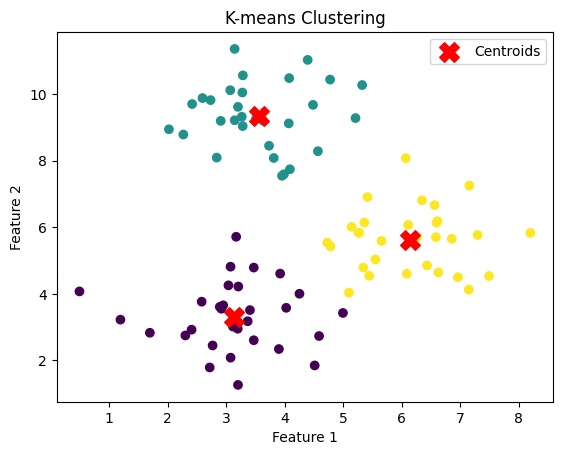

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random dataset with specified parameters
def generate_dummy_data(num_clusters, num_samples_per_cluster, num_features, random_seed=42):
    """
    generate_dummy_data: This function generates a random dataset with a specified number of clusters,
    samples per cluster, and features.
    """
    np.random.seed(random_seed)
    data = []

    for i in range(num_clusters):
        cluster_center = np.random.rand(num_features) * 10  # Random cluster center
        cluster_samples = cluster_center + np.random.randn(num_samples_per_cluster, num_features)
        data.append(cluster_samples)

    return np.vstack(data)

# Function to initialize centroids randomly from the dataset
def initialize_centroids(data, k):
    """
    initialize_centroids: Randomly selects k data points as initial centroids.
    """
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

# Function to assign each data point to the nearest centroid
def assign_to_clusters(data, centroids):
    """
    assign_to_clusters: Assigns each data point to the nearest centroid based on Euclidean distance.
    """
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids based on the mean of data points in each cluster
def update_centroids(data, cluster_assignments, k):
    """
    update_centroids: Updates the centroids based on the mean of data points in each cluster.
    """
    centroids = np.zeros((k, data.shape[1]))

    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        centroids[i] = np.mean(cluster_points, axis=0)

    return centroids

# Function to perform K-means clustering
def kmeans(data, k, max_iterations=100):
    """
    kmeans: Performs the K-means clustering algorithm using the above functions.
    Convergence is checked, and the process stops if centroids do not change.
    """
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        cluster_assignments = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(data, cluster_assignments, k)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return cluster_assignments, centroids

# Generate a dummy dataset with three clusters
num_clusters = 3
num_samples_per_cluster = 30
num_features = 2
dummy_data = generate_dummy_data(num_clusters, num_samples_per_cluster, num_features)

# Perform K-means clustering
k = 3
cluster_assignments, final_centroids = kmeans(dummy_data, k)

# Plot the original data and cluster assignments
plt.scatter(dummy_data[:, 0], dummy_data[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**Q11) Implement Hierarchical clustering without using SK-Learn create a dummy dataset use it.**

In [47]:
import numpy as np

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to calculate the distance matrix between data points
def calculate_distance_matrix(data):
    num_points = len(data)
    distance_matrix = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(i+1, num_points):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
            distance_matrix[j, i] = distance_matrix[i, j]

    return distance_matrix

# Function to find the indices of the minimum value in a 2D array
def find_min_indices(matrix):
    min_index = np.argmin(matrix)
    num_rows = matrix.shape[0]
    return min_index // num_rows, min_index % num_rows

# Function to perform hierarchical clustering
def hierarchical_clustering(data):
    clusters = [{i} for i in range(len(data))]  # Initialize each point as a cluster
    distance_matrix = calculate_distance_matrix(data)

    while len(clusters) > 1:
        # Find the indices of the closest clusters
        i, j = find_min_indices(distance_matrix)

        # Merge the clusters
        clusters[i] = clusters[i].union(clusters[j])
        del clusters[j]

        # Update the distance matrix
        distance_matrix = np.delete(distance_matrix, j, axis=0)
        distance_matrix = np.delete(distance_matrix, j, axis=1)

        for k in range(len(clusters)):
            if k != i:
                # Update the distance between the new cluster and other clusters
                distance_matrix[i, k] = min(
                    distance_matrix[i, k],
                    distance_matrix[k, i]
                )

        # Set the distance between the merged cluster and itself to infinity
        distance_matrix[i, i+1:] = np.inf
        distance_matrix[i+1:, i] = np.inf

    return clusters[0]

# Generate a dummy dataset with two features
data = np.array([
    [2, 3],
    [5, 4],
    [9, 6],
    [4, 7],
    [8, 1],
    [7, 2],
    [3, 5],
    [6, 8],
    [1, 2]
])

# Perform hierarchical clustering
final_cluster = hierarchical_clustering(data)

# Print the final cluster
print("Final Cluster:", final_cluster)


Final Cluster: {8}


**Q12) Segment a customer dataset based on the buying behaviour of customers using K- means clustering.**

Generated Dummy Customer Dataset:
Buying Behavior | Annual Spending
[[    7 14067]
 [    4 49033]
 [    8 24599]
 [    5 36222]
 [    7 12837]
 [   10 15039]
 [    3 31818]
 [    7 20115]
 [    8 11965]
 [    5 25538]
 [    4 43530]
 [    8  6056]
 [    8 33482]
 [    3 48716]
 [    6  9110]
 [    5 14773]
 [    2 28266]
 [    8 18412]
 [    6 34270]
 [    2  7910]
 [    5 46453]
 [    1 26446]
 [   10  1206]
 [    6 22518]
 [    9 23361]
 [    1 24419]
 [   10 49702]
 [    3 42523]
 [    7 46151]
 [    4 23403]
 [    9 19141]
 [    3 15820]
 [    5 41342]
 [    3  7374]
 [    7  2678]
 [    5 34827]
 [    9 17198]
 [    7 10914]
 [    2 28890]
 [    4 23299]
 [    9 44585]
 [    2 44689]
 [   10 43557]
 [    9 45020]
 [   10  3693]
 [    5 30467]
 [    2 30723]
 [    4 47699]
 [    7  4627]
 [    8 26939]
 [    3 49925]
 [    1 43941]
 [    4 22834]
 [    2 19047]
 [    8 27105]
 [    4 11230]
 [    2 16707]
 [    6 22976]
 [    6 45262]
 [   10 24776]
 [    4 31080]
 [    6  2306]
 [

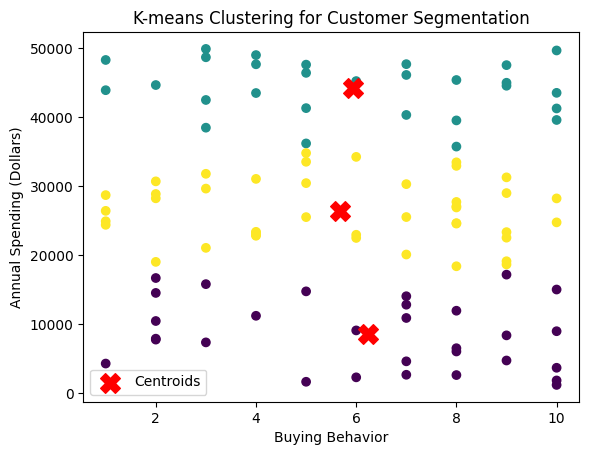

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a dummy dataset with buying behavior
def generate_customer_data(num_customers=100, random_seed=42):
    """
    Generate a small dummy dataset for customer segmentation.

    Parameters:
    - num_customers: number of customers in the dataset
    - random_seed: seed for reproducibility

    Returns:
    - data: numpy array of shape (num_customers, 2) containing the dataset
    """
    np.random.seed(random_seed)

    # Generate random buying behavior scores between 1 and 10
    buying_behavior = np.random.randint(1, 11, size=num_customers)

    # Generate random annual spending in dollars
    annual_spending = np.random.randint(1000, 50001, size=num_customers)

    # Combine the features into a 2D array
    data = np.column_stack((buying_behavior, annual_spending))

    return data

# Function to perform K-means clustering
def k_means_clustering(data, k, max_iterations=100):
    """
    Perform K-means clustering on the given data.

    Parameters:
    - data: numpy array of shape (n_samples, n_features) containing the dataset
    - k: number of clusters
    - max_iterations: maximum number of iterations for the algorithm

    Returns:
    - centroids: final centroids of the clusters
    - labels: labels indicating the cluster to which each data point belongs
    """
    # Step 1: Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Step 2: Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 3: Update centroids based on the mean of data points in each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Step 4: Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Generate dummy customer data
dummy_customer_data = generate_customer_data()

# Display the dummy dataset
print("Generated Dummy Customer Dataset:")
print("Buying Behavior | Annual Spending")
print(dummy_customer_data)

# Set the number of clusters
num_clusters = 3

# Run K-means clustering
final_centroids, cluster_labels = k_means_clustering(dummy_customer_data, num_clusters)

# Displaying the results
plt.scatter(dummy_customer_data[:, 0], dummy_customer_data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering for Customer Segmentation')
plt.xlabel('Buying Behavior')
plt.ylabel('Annual Spending (Dollars)')
plt.legend()
plt.show()


**Q13) Segment a customer dataset based on the buying behaviour of customers using Hierarchical clustering.**

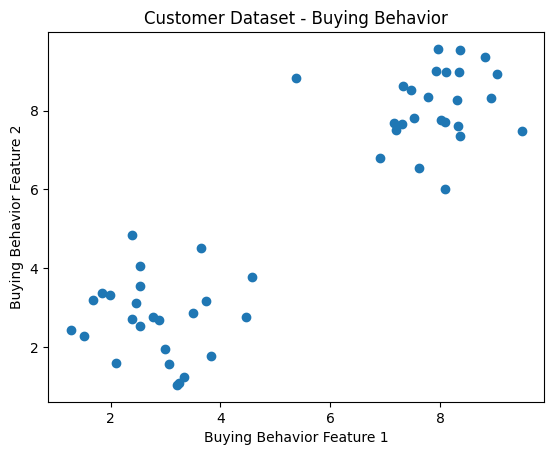

IndexError: ignored

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a small dummy dataset with buying behavior
def generate_customer_data(num_samples=50, random_seed=42):
    np.random.seed(random_seed)
    cluster1 = np.random.normal(loc=[3, 3], scale=[1, 1], size=(num_samples // 2, 2))
    cluster2 = np.random.normal(loc=[8, 8], scale=[1, 1], size=(num_samples // 2, 2))
    data = np.vstack([cluster1, cluster2])
    return data

# Function to perform hierarchical clustering
def hierarchical_clustering(data):
    distances = np.linalg.norm(data[:, np.newaxis] - data, axis=2)
    num_samples = data.shape[0]
    linkage_matrix = np.zeros((num_samples - 1, 4))
    clusters = list(range(num_samples))

    def find_min_distance(distances, clusters):
        min_distance = np.inf
        min_i, min_j = -1, -1
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if distances[clusters[i], clusters[j]] < min_distance:
                    min_distance = distances[clusters[i], clusters[j]]
                    min_i, min_j = clusters[i], clusters[j]
        return min_i, min_j

    for step in range(num_samples - 1):
        merge_i, merge_j = find_min_distance(distances, clusters)
        linkage_matrix[step, 0] = merge_i
        linkage_matrix[step, 1] = merge_j
        linkage_matrix[step, 2] = distances[merge_i, merge_j]
        linkage_matrix[step, 3] = len(clusters)
        clusters.remove(merge_i)
        clusters.remove(merge_j)
        clusters.append(num_samples + step)

        # Use the indices of remaining clusters to update distances
        remaining_clusters = list(range(len(clusters)))
        distances = distances[np.ix_(remaining_clusters, remaining_clusters)]

    return linkage_matrix

# Displaying the dataset
customer_data = generate_customer_data()
plt.scatter(customer_data[:, 0], customer_data[:, 1])
plt.title('Customer Dataset - Buying Behavior')
plt.xlabel('Buying Behavior Feature 1')
plt.ylabel('Buying Behavior Feature 2')
plt.show()

# Run hierarchical clustering
linkage_matrix = hierarchical_clustering(customer_data)

# Displaying the linkage matrix
print("Linkage Matrix:")
print(linkage_matrix)
